# Markov Chain
 
Sungchul Lee  

# State



$$i\quad\mbox{state}$$

In [1]:
import numpy as np
states = [0,1,2,3]
N_STATES = len(states)

# Transition probability



$$p_{ij}\quad\mbox{transition probability of jumping from $i$ to $j$}$$

In [2]:
P = np.empty((N_STATES, N_STATES))
l = 0.3
r = 0.3
s = 1-l-r

#             0   1   2   3   
P[ 0, :] = [s+l,  r,  0,  0]
P[ 1, :] = [  l,  s,  r,  0]
P[ 2, :] = [  0,  l,  s,  r]
P[ 3, :] = [  0,  0,  l,s+r]

print(P)

[[0.7 0.3 0.  0. ]
 [0.3 0.4 0.3 0. ]
 [0.  0.3 0.4 0.3]
 [0.  0.  0.3 0.7]]


# Initial State

In [3]:
np.random.seed(3)
state = np.random.choice(states) 
print(state)

2


# Stationary distribution $\pi$

$$
\pi {\bf P} = \pi
$$
$$$$
$$
\left[\begin{array}{ccccc}\pi[0]&\pi[1]&\pi[2]&\pi[3]\end{array}\right]
\left[\begin{array}{ccccc}
{\bf P}[0,0]&{\bf P}[0,1]&{\bf P}[0,2]&{\bf P}[0,3]\\
{\bf P}[1,0]&{\bf P}[1,1]&{\bf P}[1,2]&{\bf P}[1,3]\\
{\bf P}[2,0]&{\bf P}[2,1]&{\bf P}[2,2]&{\bf P}[2,3]\\
{\bf P}[3,0]&{\bf P}[3,1]&{\bf P}[3,2]&{\bf P}[3,3]
\end{array}\right]
=
\left[\begin{array}{ccccc}\pi[0]&\pi[1]&\pi[2]&\pi[3]\end{array}\right]
$$

$$
\pi[i]\ge 0\quad\mbox{and}\quad\sum_i\pi[i]=1
$$

1. Generate a simulated path of many steps.

2. For each time step $n$, using the first $n$ steps of sample path compute empirical PMF $\pi_n$:

$$
\pi_n[i]=\frac{\#\ \mbox{visits of state $i$ up to time $n$}}{n}
$$
$$$$
Under mild conditions, as $n\rightarrow\infty$
$$
\pi_n[i]\rightarrow\pi[i]
$$
where
$$
\pi\quad\mbox{unique stationary distribution}
$$

In [12]:
num_steps = 1000

In [13]:
visit_log = np.zeros((N_STATES,num_steps))     
for step in range(num_steps):
    visit_log[state, step] = 1.
    next_state = np.random.choice(states, p=P[state, :])
    state = next_state

In [15]:
print(visit_log)

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
print(np.cumsum(visit_log, axis=1))

[[  1.   2.   3. ... 245. 245. 245.]
 [  0.   0.   0. ... 218. 219. 219.]
 [  0.   0.   0. ... 250. 250. 251.]
 [  0.   0.   0. ... 285. 285. 285.]]


In [17]:
pi = np.cumsum(visit_log, axis=1) / (np.arange(num_steps) + 1).reshape((1,-1))
print(np.round(pi, 2)) 

[[1.   1.   1.   ... 0.25 0.25 0.24]
 [0.   0.   0.   ... 0.22 0.22 0.22]
 [0.   0.   0.   ... 0.25 0.25 0.25]
 [0.   0.   0.   ... 0.29 0.29 0.28]]


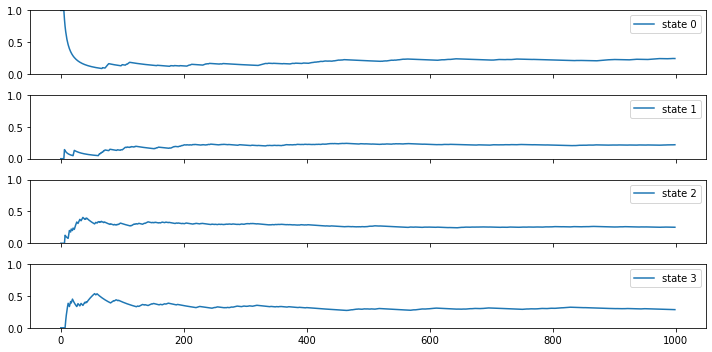

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 5), sharex=True)
for s in range(N_STATES):
    axes[s].plot(pi[s], label="state {}".format(str(s)))
    axes[s].legend(loc='upper right')
    axes[s].set_ylim([0., 1.])   
plt.tight_layout()
plt.show()